In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

d:\Documents\CentraleSupélec\SDI\Stage\dg_few_labels\code\FBC-SA-exp


In [32]:
import argparse
import torch

from dassl.utils import setup_logger, set_random_seed, collect_env_info
from dassl.config import get_cfg_default
from dassl.engine import build_trainer

# new imports
from yacs.config import CfgNode as CN
import copy

# datasets
import datasets.ssdg_pacs
import datasets.ssdg_officehome
import datasets.ssdg_digits_dg
import datasets.ssdg_vlcs

# trainers
import trainers.MI
import trainers.FBCSA

In [35]:
def extend_cfg(cfg):
    cfg.TRAINER.FBASA = CN()
    cfg.TRAINER.FBASA.CONF_THRE = 0.95  # confidence threshold
    cfg.TRAINER.FBASA.STRONG_TRANSFORMS = ()  # strong augmentations
    cfg.TRAINER.FBASA.C_OPTIM = copy.deepcopy(cfg.OPTIM)  # classifier's optim setting
    cfg.TRAINER.FBASA.CLASSIFIER = "normal"  # stochastic or normal

cfg = get_cfg_default()
extend_cfg(cfg)

dataset_config_file = 'configs/datasets/ssdg_vlcs.yaml'
cfg.merge_from_file(dataset_config_file)

config_file = 'configs/trainers/FBCSA/ssdg_vlcs.yaml'
cfg.merge_from_file(config_file)

cfg.DATASET.ROOT = '../../data'
cfg.OUTPUT_DIR = 'output/test'
cfg.SEED = 3
# cfg.DATASET.SOURCE_DOMAINS = ['clipart', 'product', 'real_world']
# cfg.DATASET.TARGET_DOMAINS = ['art']
# cfg.DATASET.SOURCE_DOMAINS = ['art_painting', 'cartoon', 'sketch']
# cfg.DATASET.TARGET_DOMAINS = ['photo']
# cfg.DATASET.SOURCE_DOMAINS = ['mnist', 'svhn', 'syn']
# cfg.DATASET.TARGET_DOMAINS = ['mnist_m']
cfg.DATASET.SOURCE_DOMAINS = ['caltech', 'labelme', 'pascal']
cfg.DATASET.TARGET_DOMAINS = ['sun']
cfg.DATASET.ONE_SOURCE_L = 'labelme'
cfg.TRAINER.NAME = 'MI'
cfg.TRAINER.FBASA.IMBALANCE = 'original'  # random label or not
cfg.TRAINER.FBASA.GAMMA = 10  # class imbalance ratio
cfg.TRAINER.FBASA.LAMBDA = 0
cfg.TRAINER.FBASA.ALPHA = 0.1 # value from the ALPHA-TIM implementation for 5 shots or more

print(cfg)

DATALOADER:
  K_TRANSFORMS: 1
  NUM_WORKERS: 4
  RETURN_IMG0: True
  TEST:
    BATCH_SIZE: 100
    SAMPLER: SequentialSampler
  TRAIN_U:
    BATCH_SIZE: 32
    N_DOMAIN: 0
    N_INS: 16
    SAME_AS_X: True
    SAMPLER: RandomSampler
  TRAIN_X:
    BATCH_SIZE: 48
    N_DOMAIN: 0
    N_INS: 16
    SAMPLER: SeqDomainSampler
DATASET:
  ALL_AS_UNLABELED: False
  CIFAR_C_LEVEL: 1
  CIFAR_C_TYPE: 
  NAME: SSDGVLCS
  NUM_LABELED: 150
  NUM_SHOTS: -1
  ONE_SOURCE_L: labelme
  ROOT: ../../data
  SOURCE_DOMAINS: ['caltech', 'labelme', 'pascal']
  STL10_FOLD: -1
  TARGET_DOMAINS: ['sun']
  VAL_PERCENT: 0.1
INPUT:
  COLORJITTER_B: 0.4
  COLORJITTER_C: 0.4
  COLORJITTER_H: 0.1
  COLORJITTER_S: 0.4
  CROP_PADDING: 4
  CUTOUT_LEN: 16
  CUTOUT_N: 1
  GB_K: 21
  GB_P: 0.5
  GN_MEAN: 0.0
  GN_STD: 0.15
  INTERPOLATION: bilinear
  NO_TRANSFORM: False
  PIXEL_MEAN: [0.485, 0.456, 0.406]
  PIXEL_STD: [0.229, 0.224, 0.225]
  RANDAUGMENT_M: 10
  RANDAUGMENT_N: 2
  RGS_P: 0.2
  RRCROP_SCALE: (0.08, 1.0)
  SIZE

In [12]:
set_random_seed(cfg.SEED)

In [36]:
# import datasets.ssdg_officehome
# import datasets.ssdg_pacs
# import datasets.ssdg_digits_dg
trainer = build_trainer(cfg)

Loading trainer: MI
Building transform_train
+ resize to 224x224
+ random translation
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building transform_train
+ resize to 224x224
+ random flip
+ randaugment_fixmatch (n=2)
+ to torch tensor of range [0, 1]
+ cutout (n_holes=1, length=16)
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Loading dataset: SSDGVLCS
Class distribution in the labeled training set:
defaultdict(<class 'int'>, {0: 30, 1: 30, 2: 30, 3: 29, 4: 30})
Class distribution in the unlabeled training set:
defaultdict(<class 'int'>, {0: 423, 1: 1391, 2: 415, 3: 341, 4: 2494})
* Using custom transform for training
Building transform_test
+ resize the smaller edge to 224
+ 224x224 center crop
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
---------  --------------------------------
Dataset    SSDGVLCS
Source     ['caltech',

In [24]:
# lab2cname = {0: 'dog', 1: 'elephant', 2: 'giraffe', 3: 'guitar', 4: 'horse', 5: 'house', 6: 'person'}

# import os
# lab2cname = {}
# for i, cname in enumerate(os.listdir('../../data/office_home_dg/real_world/train')):
#     lab2cname[i] = cname

# lab2cname = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

lab2cname = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}

In [19]:
import matplotlib.pyplot as plt
# import os.path as osp
import random
from collections import defaultdict
from dassl.data.datasets import Datum
import numpy as np

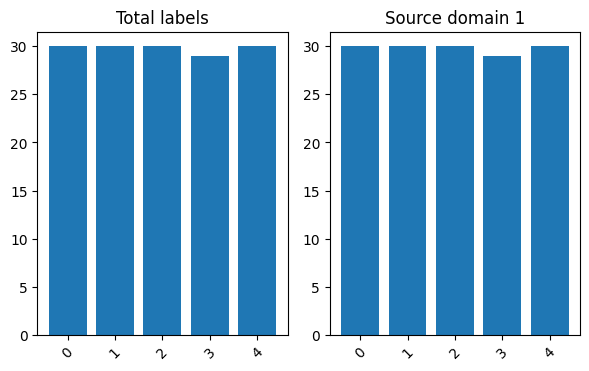

: 

In [37]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

train_x = trainer.dm.dataset.train_x

labels = [datum.label for datum in train_x]

# Count the frequency of each label
labels_counter = Counter(labels)
if cfg.TRAINER.FBASA.IMBALANCE == 'exp_l_only':
    labels_sorted = sorted(labels_counter.items(), key=lambda x: x[1], reverse=True)
    classes = [lab2cname[label] for label, count in labels_sorted]
    counts = [count for label, count in labels_sorted]
else:
    classes = lab2cname.values()
    counts = [labels_counter[label] for label in range(len(classes))]

train_u_d = defaultdict(list)
for datum in train_x:
    train_u_d[datum.domain].append(datum)

plt.figure(figsize=(6, 7))
plt.subplot(2, 2, 1)
plt.bar(classes, counts)
plt.xticks(rotation=45)
plt.title('Total labels')

for i, domain in enumerate(train_u_d.keys()):
    labels = [datum.label for datum in train_u_d[domain]]
    
    # Count the frequency of each label in this domain
    labels_counter = Counter(labels)
    if cfg.TRAINER.FBASA.IMBALANCE == 'exp_l_only':
        labels_sorted = sorted(labels_counter.items(), key=lambda x: x[1], reverse=True)
        classes = [lab2cname[label] for label, count in labels_sorted]
        counts = [count for label, count in labels_sorted]
    else:
        classes = lab2cname.values()
        counts = [labels_counter[label] for label in range(len(classes))]

    plt.subplot(2, 2, i+2)
    plt.bar(classes, counts)
    plt.xticks(rotation=45)
    plt.title(f'Source domain {domain}')

plt.tight_layout()
plt.show()

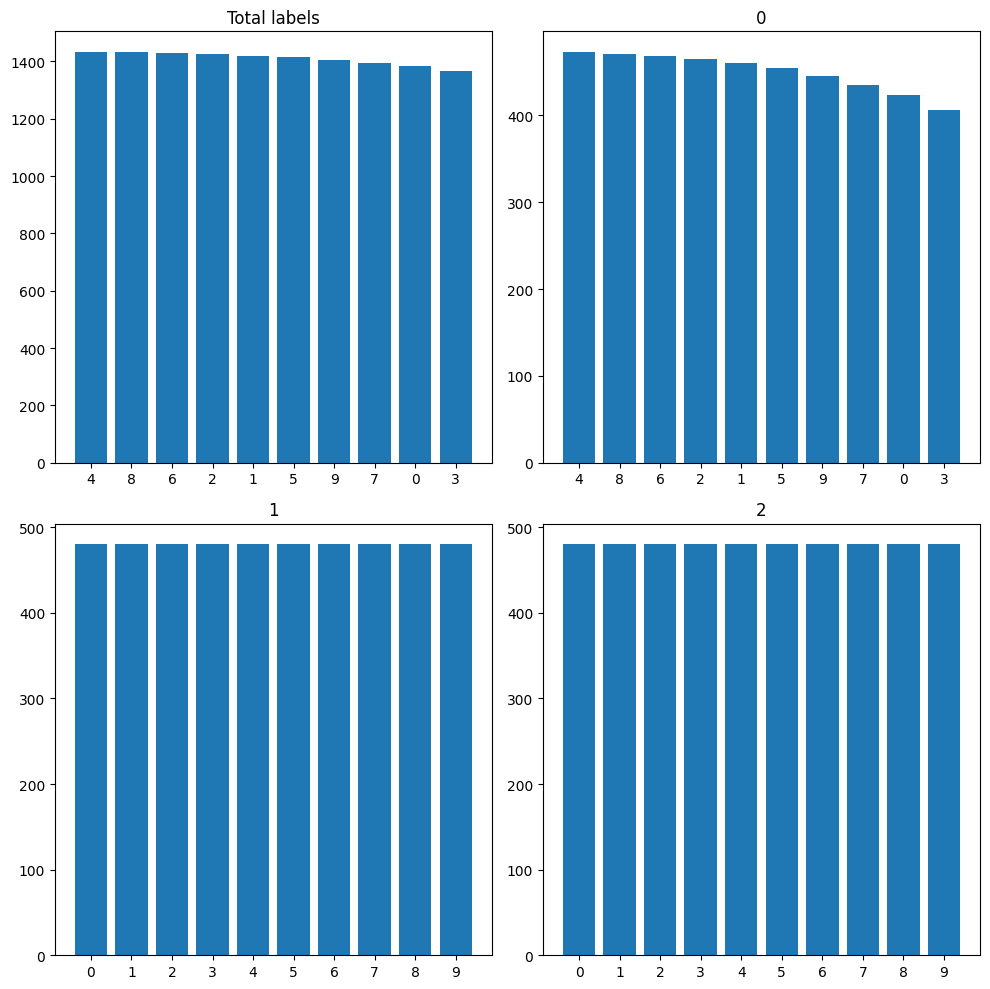

In [10]:
train_u = trainer.dm.dataset.train_u

labels = [datum.label for datum in train_u]

# Count the frequency of each label
labels_counter = Counter(labels)
labels_sorted = sorted(labels_counter.items(), key=lambda x: x[1], reverse=True)
labels = [str(label) for label, count in labels_sorted]
counts = [count for label, count in labels_sorted]

train_u_d = defaultdict(list)
for datum in train_u:
    train_u_d[datum.domain].append(datum)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.bar(labels, counts)
plt.title('Total labels')

for i, domain in enumerate(train_u_d.keys()):
    labels = [datum.label for datum in train_u_d[domain]]
    
    # Count the frequency of each label in this domain
    labels_counter = Counter(labels)
    labels_sorted = sorted(labels_counter.items(), key=lambda x: x[1], reverse=True)
    labels = [str(label) for label, count in labels_sorted]
    counts = [count for label, count in labels_sorted]

    plt.subplot(2, 2, i+2)
    plt.bar(labels, counts)
    plt.title(domain)

plt.tight_layout()
plt.show()

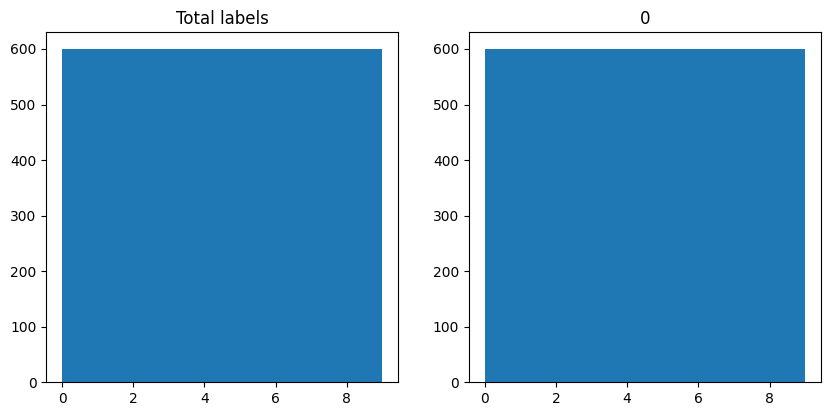

In [11]:
test = trainer.dm.dataset.test

labels = [datum.label for datum in test]

test_d = defaultdict(list)

for datum in test:
    test_d[datum.domain].append(datum)

# histogram of total labels and labels per domain
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(labels, bins=len(set(labels)))
plt.title('Total labels')

for i, domain in enumerate(test_d.keys()):
    labels = [datum.label for datum in test_d[domain]]
    plt.subplot(2, 2, i+2)
    plt.hist(labels, bins=len(set(labels)))
    plt.title(domain)

plt.show()

In [12]:
import ast

def extract_distributions(log_file):
    labeled_dict = None
    unlabeled_dict = None
    
    with open(log_file, 'r') as file:
        for line in file:
            if 'Class distribution in the labeled training set:' in line:
                labeled_dict_line = next(file).strip()
                labeled_dict = ast.literal_eval(labeled_dict_line.split('defaultdict(<class \'int\'>, ')[1].rstrip(')'))
            elif 'Class distribution in the unlabeled training set:' in line:
                unlabeled_dict_line = next(file).strip()
                unlabeled_dict = ast.literal_eval(unlabeled_dict_line.split('defaultdict(<class \'int\'>, ')[1].rstrip(')'))

    return labeled_dict, unlabeled_dict

log_file = 'log.txt'
labeled_dict, unlabeled_dict = extract_distributions(log_file)

print("Labeled training set distribution:", labeled_dict)
print("Unlabeled training set distribution:", unlabeled_dict)


Labeled training set distribution: {0: 21, 1: 6, 2: 9, 3: 36, 4: 72, 5: 15, 6: 51}
Unlabeled training set distribution: {0: 1192, 1: 1251, 2: 1142, 3: 799, 4: 1132, 5: 566, 6: 844}


In [13]:
np.argsort(list(labeled_dict.values()))[::-1]

array([4, 6, 3, 0, 5, 2, 1], dtype=int64)

In [14]:
import re

match = re.match(r'\* class: (\d+) \(\)\ttotal: \d+\tcorrect: \d+\tacc: ([\d\.]+)%', '* class: 0 ()	total: 379	correct: 296	acc: 78.1%')
match.group(1), match.group(2)

('0', '78.1')

## Datasets distribution

In [15]:
import os
import matplotlib.pyplot as plt

C:\Users\qg91v\AppData\Local\Temp\ipykernel_15132\3308340807.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution[domain].keys(), rotation=45)


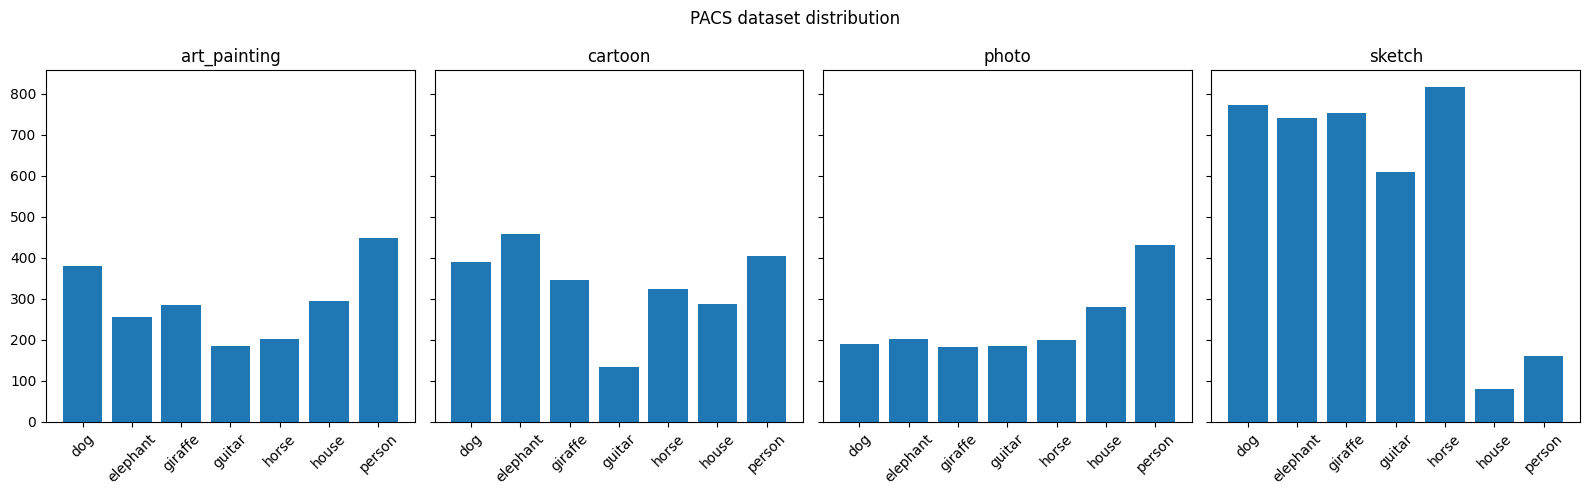

In [16]:
dataset_path = '../../data/pacs/images'
categories = ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']
domains = ['art_painting', 'cartoon', 'photo', 'sketch']

# get the number of images per category per domain
distribution = {}
for domain in domains:
    domain_path = os.path.join(dataset_path, domain)
    distribution[domain] = {}
    for category in categories:
        category_path = os.path.join(domain_path, category)
        distribution[domain][category] = len(os.listdir(category_path))

# plot the distribution
fig, axs = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
for i, domain in enumerate(domains):
    ax = axs[i]
    ax.bar(distribution[domain].keys(), distribution[domain].values())
    ax.set_title(domain)
    ax.set_xticklabels(distribution[domain].keys(), rotation=45)
plt.suptitle('PACS dataset distribution')
plt.tight_layout()
plt.show()

In [17]:
def exp_imbalance_l(N, C, gamma):
    '''
    N: total number of samples
    C: number of classes
    gamma: imbalance ratio

    return: list of number of samples per class with exponential imbalance
    '''
    n1 = N*(1-gamma**(-1/(C-1)))/(1-gamma**(-C/(C-1)))
    n_samples = []

    for i in range(C):
        n_samples.append(int(n1*gamma**(-i/(C-1))))

    # add remaining samples to the first classes
    for i in range(N-sum(n_samples)):
        n_samples[i] += 1

    return n_samples

C:\Users\qg91v\AppData\Local\Temp\ipykernel_15132\762787903.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution[domain].keys(), rotation=45)


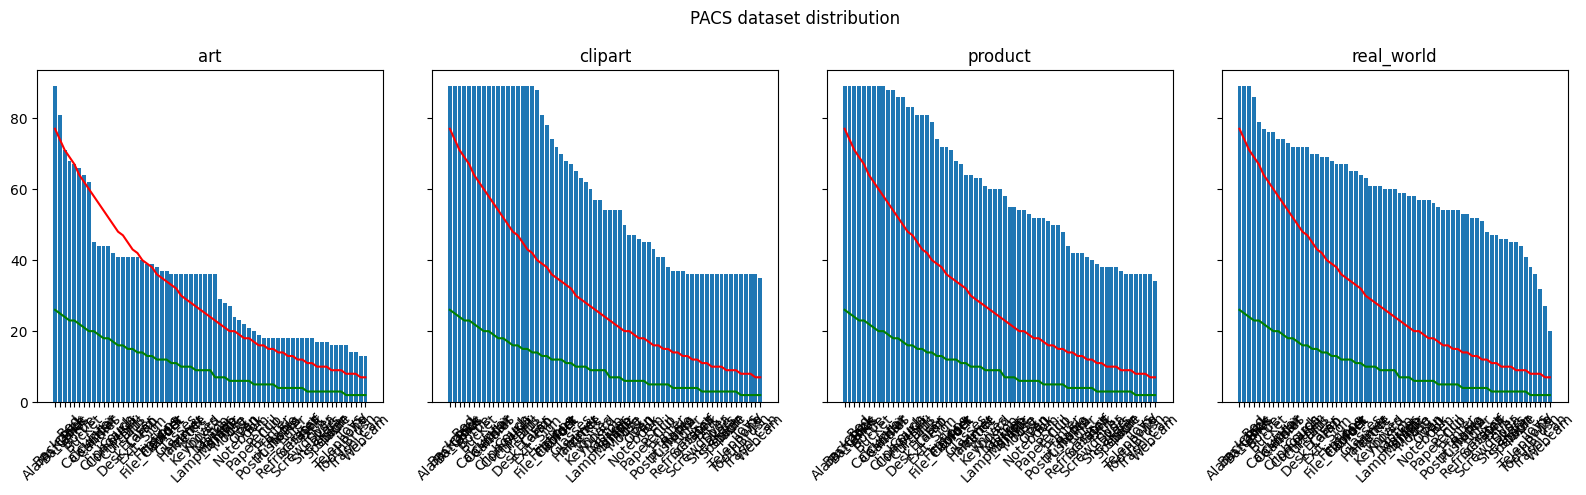

In [18]:
dataset_path = '../../data/office_home_dg'
categories = os.listdir('../../data/office_home_dg/real_world/train')
domains = ['art', 'clipart', 'product', 'real_world']

# get the number of images per category per domain
distribution = {}
for domain in domains:
    domain_path = os.path.join(dataset_path, domain, 'train').replace(os.sep, '/')
    distribution[domain] = {}
    for category in categories:
        category_path = os.path.join(domain_path, category).replace(os.sep, '/')
        distribution[domain][category] = len(os.listdir(category_path))

# plot the distribution
fig, axs = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
for i, domain in enumerate(domains):
    ax = axs[i]
    # ax.bar(distribution[domain].keys(), distribution[domain].values())
    # Bar by descending order
    ax.bar([k for k, v in sorted(distribution[domain].items(), key=lambda item: item[1], reverse=True)], [v for k, v in sorted(distribution[domain].items(), key=lambda item: item[1], reverse=True)])
    ax.plot([k for k, v in sorted(distribution[domain].items(), key=lambda item: item[1], reverse=True)], exp_imbalance_l(1950, len(categories), 10), color='red')
    ax.plot([k for k, v in sorted(distribution[domain].items(), key=lambda item: item[1], reverse=True)], exp_imbalance_l(1950//3, len(categories), 10), color='green')
    ax.set_title(domain)
    ax.set_xticklabels(distribution[domain].keys(), rotation=45)
plt.suptitle('PACS dataset distribution')
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

In [20]:
a = np.array([0,2,3])
b = np.array([1,2,4])
# c = np.zeros(3)

# for i in range(3):
#     c[i] = min(a[i], b[i])

assert (a <= b).all()

In [21]:
[0,1,2] >= [0,1,3]

False